Analyze the result produced by 06.monte_carlo_test

In [19]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
TITLE_SIZE = 16
LABEL_SIZE = 16
TICK_SIZE = 14
LEGEND_SIZE = 16

In [21]:
folder = '/content/drive/My Drive/time_sequence_alchemy/test_result/'
#fn = 'monte_carlo_results.csv'
fn = 'monte_carlo_results_imbalance.csv'

df = pd.read_csv(folder+fn)
df.tail(11)

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
325,336,TS_RNN_ZOH,False,960,0.5,6,4,0.995622,0.996923,0.917197,0.955400
326,337,TS_RNN_ZOH,False,960,0.5,7,4,0.991605,0.891838,0.951168,0.920548
327,338,TS_RNN_ZOH,False,960,0.5,8,4,0.990628,0.869398,0.961076,0.912941
328,339,TS_RNN_ZOH,False,960,0.5,9,4,0.990918,0.925953,0.893843,0.909615
329,340,TS_RNN_ZOH,False,960,0.5,10,4,0.996924,0.983261,0.956122,0.969501
330,341,TS_RNN_ZOH,False,1920,0.5,1,4,0.994960,0.994713,0.890467,0.939707
331,342,TS_RNN_ZOH,False,1920,0.5,2,4,0.996839,0.987918,0.939824,0.963271
332,343,TS_RNN_ZOH,False,1920,0.5,3,4,0.990368,0.919448,0.856660,0.886944
333,344,TS_RNN_ZOH,False,1920,0.5,4,4,0.993439,0.995279,0.855308,0.920000
334,345,TS_RNN_ZOH,False,1920,0.5,5,4,0.993231,0.978593,0.865450,0.918550


In [22]:
# change the model names such that the graph looks prettier
df = df.replace('CNN_1', 'CNN')
df = df.replace('RNN_1', 'RNN')
df = df.replace('TS_RNN_1', 'TS_RNN_LIN')
df = df.replace('TS_CNN_1', 'TS_CNN_LIN')
df.head(10)

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
0,1,CNN,False,120,0.5,1,4,0.998123,0.999199,0.971184,0.984992
1,2,CNN,False,120,0.5,2,4,0.999605,0.994574,0.999221,0.996892
2,3,CNN,False,120,0.5,3,4,0.999506,0.993798,0.998442,0.996115
3,4,CNN,False,120,0.5,4,4,0.999556,0.994569,0.998442,0.996502
4,5,CNN,False,120,0.5,5,4,0.999407,0.992260,0.998442,0.995342
5,6,CNN,False,120,0.5,6,4,0.998716,0.980153,1.000000,0.989977
6,7,CNN,False,120,0.5,7,4,0.999556,0.994569,0.998442,0.996502
7,8,CNN,False,120,0.5,8,4,0.999605,0.994574,0.999221,0.996892
8,9,CNN,False,120,0.5,9,4,0.999556,0.993803,0.999221,0.996505
9,10,CNN,False,120,0.5,10,4,0.999605,0.995342,0.998442,0.996890


In [53]:
# check specific test
test = df.loc[df.model_name=='TS_CNN_ZOH']
test = test.loc[test.ts_thres==960]
test.sort_values('test_f1')

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
270,281,TS_CNN_ZOH,False,960,0.5,1,4,0.998806,0.978502,0.998585,0.988441
271,282,TS_CNN_ZOH,False,960,0.5,2,4,0.998806,0.978502,0.998585,0.988441
273,284,TS_CNN_ZOH,False,960,0.5,4,4,0.998806,0.978502,0.998585,0.988441
276,287,TS_CNN_ZOH,False,960,0.5,7,4,0.998806,0.978502,0.998585,0.988441
272,283,TS_CNN_ZOH,False,960,0.5,3,4,0.998842,0.978517,0.999292,0.988796
274,285,TS_CNN_ZOH,False,960,0.5,5,4,0.998842,0.978517,0.999292,0.988796
275,286,TS_CNN_ZOH,False,960,0.5,6,4,0.998842,0.978517,0.999292,0.988796
277,288,TS_CNN_ZOH,False,960,0.5,8,4,0.998842,0.978517,0.999292,0.988796
278,289,TS_CNN_ZOH,False,960,0.5,9,4,0.998842,0.978517,0.999292,0.988796
279,290,TS_CNN_ZOH,False,960,0.5,10,4,0.998842,0.978517,0.999292,0.988796


In [5]:
# Remove results caused by failed training.
thres = 0.95
print(df.loc[df.test_acc < thres])
df = df.loc[df.test_acc >= thres]

      id  model_name  data_trim  ...    test_p    test_r   test_f1
99   110       RNN_1      False  ...  0.061092  1.000000  0.115150
154  165    TS_RNN_1      False  ...  0.056326  1.000000  0.106645
155  166    TS_RNN_1      False  ...  0.278754  0.979427  0.433990
234  245    TS_RNN_1      False  ...  0.044106  1.000000  0.084485
239  250    TS_RNN_1      False  ...  0.044049  0.998648  0.084376
314  325  TS_RNN_ZOH      False  ...  0.058319  0.993387  0.110169

[6 rows x 11 columns]


## box plot example

In [23]:
df1 = df.loc[df.model_name=='CNN']
df1 = df1.loc[df1.ts_thres==120]
df1

,id,model_name,data_trim,ts_thres,pred_thres,repeat_id,epochs,test_acc,test_p,test_r,test_f1
0,1,CNN,False,120,0.5,1,4,0.998123,0.999199,0.971184,0.984992
1,2,CNN,False,120,0.5,2,4,0.999605,0.994574,0.999221,0.996892
2,3,CNN,False,120,0.5,3,4,0.999506,0.993798,0.998442,0.996115
3,4,CNN,False,120,0.5,4,4,0.999556,0.994569,0.998442,0.996502
4,5,CNN,False,120,0.5,5,4,0.999407,0.992260,0.998442,0.995342
5,6,CNN,False,120,0.5,6,4,0.998716,0.980153,1.000000,0.989977
6,7,CNN,False,120,0.5,7,4,0.999556,0.994569,0.998442,0.996502
7,8,CNN,False,120,0.5,8,4,0.999605,0.994574,0.999221,0.996892
8,9,CNN,False,120,0.5,9,4,0.999556,0.993803,0.999221,0.996505
9,10,CNN,False,120,0.5,10,4,0.999605,0.995342,0.998442,0.996890


array([0.99812336, 0.99960492, 0.99950615, 0.99955553, 0.99940738,
       0.99871599, 0.99955553, 0.99960492, 0.99955553, 0.99960492])

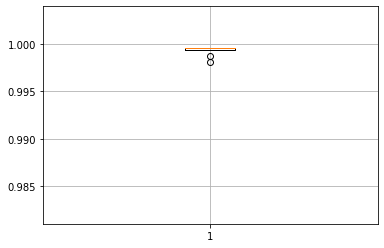

In [7]:
acc = df1['test_acc'].values
plt.boxplot([acc], showfliers=True, whis=0.75)
plt.grid()
plt.ylim([0.981,1.004])
acc

# Double Whisker Plots

In [24]:
# the function to plot double wisker

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
def double_wisker(df, label_1, label_2, y_range=None):
    ''' Plot double wisker using sns, two labels, labels must match dataframe columns.
    x range is fixed [120, 240, 480, 960, 1920]'''

    x_entry=[60, 120, 240, 480, 960, 1920]
    n_entry = len(x_entry)

    # select only the rows we need.
    df1 = df.loc[df['model_name'].isin([label_1, label_2])]
    
    # Plot wisker box
    # Problem here: the order of wiskers (who is left who is right) 
    # is automatically determined by the dataframe. Can't specify manually.
    # Here is a workaround.
    if df1['model_name'].iloc[0] == label_1:   # first entry is label_1, the order is fine
        pass
    else:
        df1 = df1[::-1]  # reverse the order of rows, so that the first entry is label_2
    
    # Plot wisker box
    plt.figure(figsize=(9,7))
    sns.set(style="ticks")
    ax = sns.boxplot(x="ts_thres", y="test_f1", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)

    # Configure plot
    ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
    ax.set_ylabel('F1 Score (%)', fontsize=LABEL_SIZE)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
    plt.xticks(np.arange(0,n_entry), x_entry, fontsize=TICK_SIZE)
    plt.yticks(fontsize=TICK_SIZE)
    plt.legend(fontsize=LEGEND_SIZE)
    plt.grid()
    plt.ylabel('F1 Score', fontsize=LABEL_SIZE)
    ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
    plt.xlim([0.5, 5.5])  # don't display the x=60 ticks.
    if y_range is not None:
        plt.ylim(y_range)

    # calculate median
    df1 = df.loc[df['model_name'].isin([label_1])]
    median_1 = [df1.loc[df1.ts_thres==ts].test_f1.median() for ts in x_entry]
    df2 = df.loc[df['model_name'].isin([label_2])]
    median_2 = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in x_entry]

    # plot median, only for 
    x_pos = np.array([1,2,3,4,5], dtype='float')
    x_offset = 0.15
    plt.plot(x_pos-x_offset, median_1[1:], '--', marker='x', markersize=5, c='magenta', linewidth=1)
    plt.scatter(x_pos-x_offset, median_1[1:], s=75, marker='x', c='black', linewidth=2)
    plt.plot(x_pos+x_offset, median_2[1:], '--', marker='x', markersize=5, c='green', linewidth=1)
    plt.scatter(x_pos+x_offset, median_2[1:], s=75, marker='x', c='black', linewidth=2)

## Multiple box plot - CNN

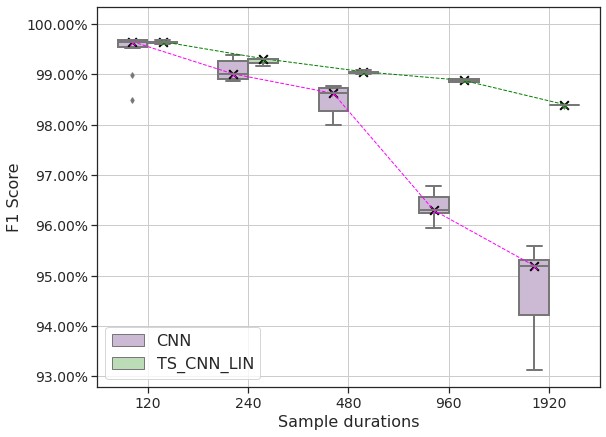

In [27]:
label_1 = 'CNN'
label_2 = 'TS_CNN_LIN'
double_wisker(df, label_1, label_2)

## Multiple box plot - RNN

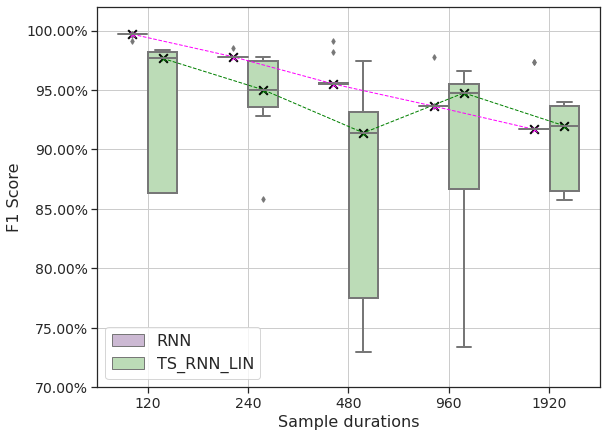

In [29]:
label_1 = 'RNN'
label_2 = 'TS_RNN_LIN'
double_wisker(df, label_1, label_2, y_range=[0.7,1.02])

## Multiple box plot - CNN ZOH

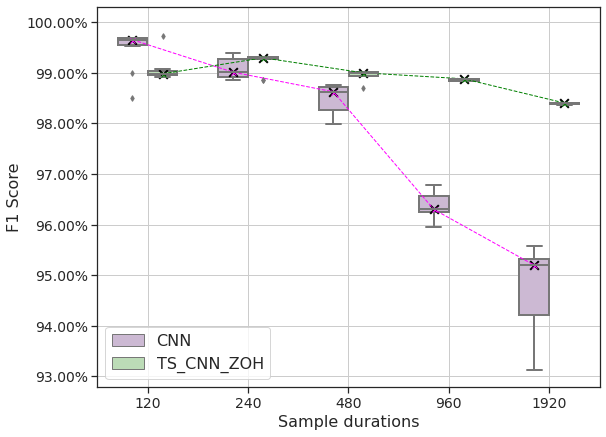

In [30]:
label_1 = 'CNN'
label_2 = 'TS_CNN_ZOH'
double_wisker(df, label_1, label_2)

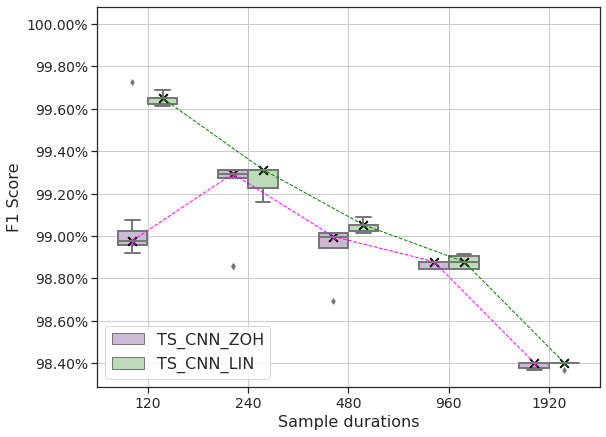

In [31]:
label_1 = 'TS_CNN_ZOH'
label_2 = 'TS_CNN_LIN'
double_wisker(df, label_1, label_2)

## Multiple box plot - RNN ZOH

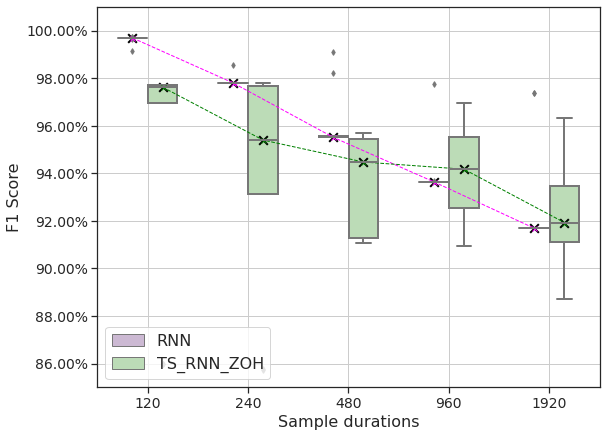

In [34]:
label_1 = 'RNN'
label_2 = 'TS_RNN_ZOH'
double_wisker(df, label_1, label_2, y_range=[0.85,1.01])

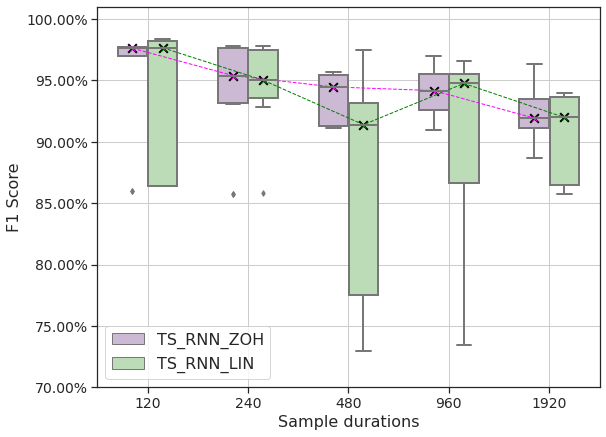

In [33]:
label_1 = 'TS_RNN_ZOH'
label_2 = 'TS_RNN_LIN'
double_wisker(df, label_1, label_2,  y_range=[0.7,1.01])

# Legacy code

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([ 98. ,  98.5,  99. ,  99.5, 100. , 100.5]),
 <a list of 6 Text major ticklabel objects>)

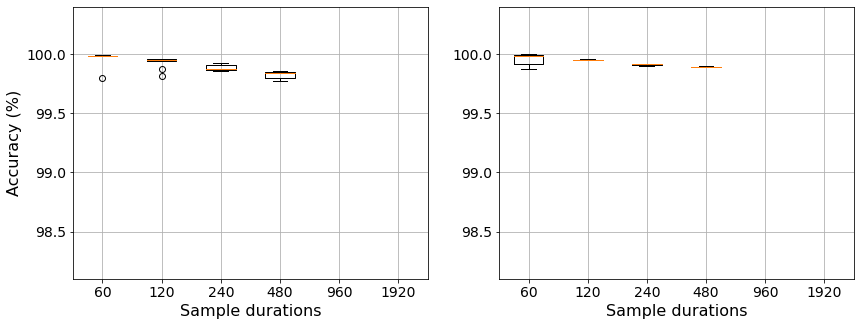

In [ ]:
df1 = df.loc[df.model_name=='CNN_1']
acc = []
labels = [60, 120, 240, 480, 960, 1920]
for ts in labels:
  df2 = df1.loc[df1.ts_thres==ts]
  acc.append(df2['test_acc'].values*100)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.boxplot(acc, showfliers=True, labels=labels) # whis=1
plt.grid()
plt.ylim([98.1,100.4])
plt.xlabel('Sample durations', fontsize=LABEL_SIZE)
plt.ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
plt.xticks(fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)

# 2nd piece
df1 = df.loc[df.model_name=='TS_CNN_1']
acc = []
labels = [60, 120, 240, 480, 960, 1920]
for ts in labels:
  df2 = df1.loc[df1.ts_thres==ts]
  acc.append(df2['test_acc'].values*100)

plt.subplot(1,2,2)
plt.boxplot(acc, showfliers=True, labels=labels)  # whis=1
plt.grid()
plt.ylim([98.1,100.4])
plt.xlabel('Sample durations', fontsize=LABEL_SIZE)
# plt.ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
plt.xticks(fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)

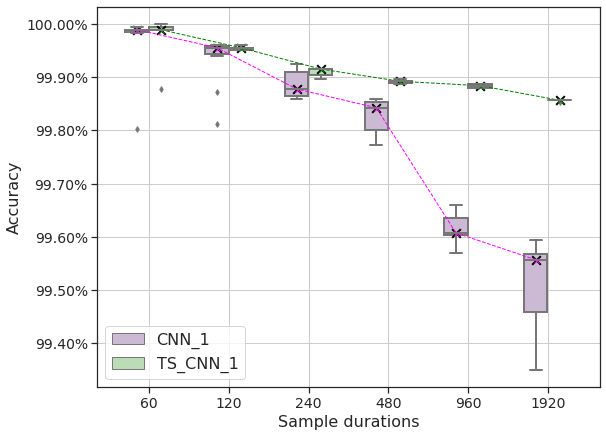

In [ ]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['CNN_1', 'TS_CNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_acc", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.grid()
plt.ylabel('Accuracy', fontsize=LABEL_SIZE)
ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
#plt.ylim([0.998, 1.0005])

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['CNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_CNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]

x_pos = np.array([0,1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median, '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median, s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median, '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median, s=75, marker='x', c='black', linewidth=2)

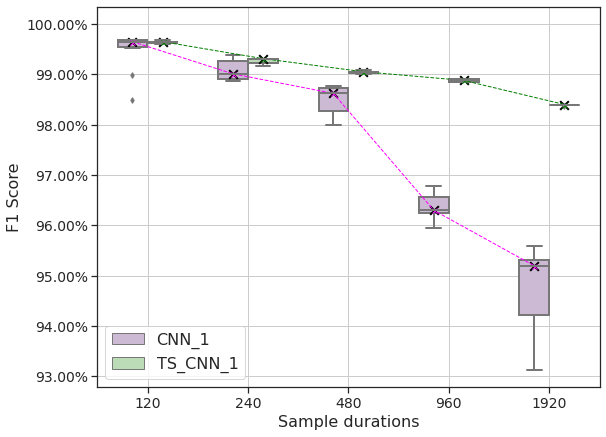

In [ ]:
# F1 score graph (120s+)
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['CNN_1', 'TS_CNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_f1", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('F1 Score (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.grid()
plt.ylabel('F1 Score', fontsize=LABEL_SIZE)
ax.legend(loc='lower left', fontsize=LEGEND_SIZE)
plt.xlim([0.5, 5.5])
#plt.ylim([0.995, 1.0005])

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['CNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_CNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_f1.median() for ts in ts_label]

x_pos = np.array([1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median[1:], '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median[1:], s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median[1:], '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median[1:], s=75, marker='x', c='black', linewidth=2)

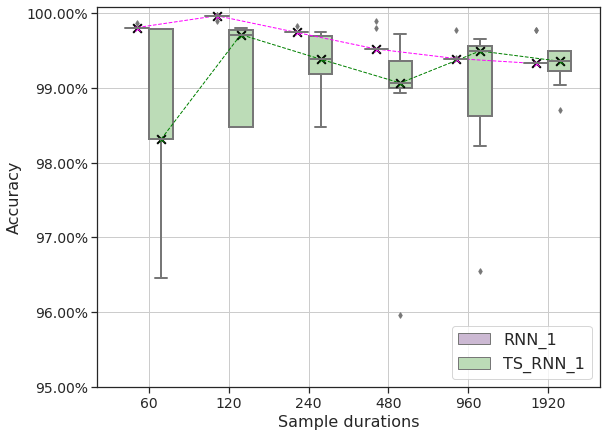

In [ ]:
# Accuracy score
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

ts_label = [60, 120, 240, 480, 960, 1920]
df1 = df.loc[df['model_name'].isin(['RNN_1', 'TS_RNN_1'])]

plt.figure(figsize=(9,7))
sns.set(style="ticks")
ax = sns.boxplot(x="ts_thres", y="test_acc", hue="model_name", data=df1, width=0.6, palette="PRGn", linewidth=2, whis=1.5, fliersize=4)
ax.set_xlabel('Sample durations', fontsize=LABEL_SIZE)
ax.set_ylabel('Accuracy (%)', fontsize=LABEL_SIZE)
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.2%}'))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.xticks(np.arange(0,6), ts_label, fontsize=TICK_SIZE)
plt.yticks(fontsize=TICK_SIZE)
plt.legend(fontsize=LEGEND_SIZE)
plt.ylim([0.950, 1.0008])
plt.grid()
plt.ylabel('Accuracy', fontsize=LABEL_SIZE)
plt.legend(loc='lower right',fontsize=LEGEND_SIZE)

# plot median
ts_label = [60, 120, 240, 480, 960, 1920]
df2 = df.loc[df['model_name'].isin(['RNN_1'])]
cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]
df2 = df.loc[df['model_name'].isin(['TS_RNN_1'])]
ts_cnn_median = [df2.loc[df2.ts_thres==ts].test_acc.median() for ts in ts_label]

x_pos = np.array([0,1,2,3,4,5], dtype='float')
x_offset = 0.15
plt.plot(x_pos-x_offset, cnn_median, '--', marker='x', markersize=5, c='magenta', linewidth=1)
plt.scatter(x_pos-x_offset, cnn_median, s=75, marker='x', c='black', linewidth=2)
plt.plot(x_pos+x_offset, ts_cnn_median, '--', marker='x', markersize=5, c='green', linewidth=1)
plt.scatter(x_pos+x_offset, ts_cnn_median, s=75, marker='x', c='black', linewidth=2)